<a href="https://colab.research.google.com/github/njw8jx/ds3001group/blob/main/NorthCarolinaEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/njw8jx/ds3001group


Cloning into 'ds3001group'...
remote: Enumerating objects: 497, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 497 (delta 94), reused 31 (delta 31), pack-reused 353 (from 1)
Receiving objects: 100% (497/497), 43.54 MiB | 12.17 MiB/s, done.
Resolving deltas: 100% (244/244), done.


In [5]:
# Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Read in files

outcomes = pd.read_excel("/content/ds3001group/dataverse_files/WinningPartyByCounties.xlsx") # party outcome at county level
rawdemo2012 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2012.xlsx") # demographic variables at county level 2012
rawdemo2016 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2016.xlsx") # demographic variables at county level 2016
rawdemo2020 = pd.read_excel("/content/ds3001group/dataverse_files/demographicsallstates2020.xlsx") # demographic variables at county level 2020

ncpoverty = pd.read_csv("/content/ds3001group/north carolina/ncpoverty.csv") # poverty variable at county level -- NC
ncpoverty = ncpoverty.drop([0,1, 38, 39]) # Drop national and state level statistics


In [11]:
# Filter files for North Carolina

ncoutcomes = outcomes[outcomes['state'] == 'NORTH CAROLINA'] # filtered outcome variable for North Carolina

demo2012 = rawdemo2012[rawdemo2012['State Name'] == 'North Carolina']
demo2016 = rawdemo2016[rawdemo2016['State Name'] == 'North Carolina']
demo2020 = rawdemo2020[rawdemo2020['State Name'] == 'North Carolina'] # filtered demographic variables for North Carolina

In [13]:
# Separate outcomes & poverty by year

ncoutcomes2012 = ncoutcomes[ncoutcomes['year'] == 2012]
ncoutcomes2016 = ncoutcomes[ncoutcomes['year'] == 2016]
ncoutcomes2020 = ncoutcomes[ncoutcomes['year'] == 2020] # separated outcomes variable by year

ncpoverty2012 = ncpoverty[ncpoverty['Year'] == 2012]
ncpoverty2016 = ncpoverty[ncpoverty['Year'] == 2016]
ncpoverty2020 = ncpoverty[ncpoverty['Year'] == 2020] # separated poverty variable by year

In [14]:
# Merge

election2012 = pd.merge(demo2012, ncpoverty2012, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2012 = pd.merge(election2012, ncoutcomes2012, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2012
# now have a complete file for 2012

election2016 = pd.merge(demo2016, ncpoverty2016, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2016 = pd.merge(election2016, ncoutcomes2016, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2016
# now have a complete file for 2016

election2020 = pd.merge(demo2020, ncpoverty2020, left_on='County Name', right_on='Name', how='outer') # Merge poverty with demographics
election2020 = pd.merge(election2020, ncoutcomes2020, left_on='ID', right_on='county_fips', how='outer') # Merge outcomes with election2012
# now have a complete file for 2020

In [15]:
# Wrangling

election2012['Percent in Poverty'].unique()
election2016['Percent in Poverty'].unique()
election2020['Percent in Poverty'].unique()

election2012['Percent in Poverty'].value_counts()
election2016['Percent in Poverty'].value_counts()
election2020['Percent in Poverty'].value_counts()

election2012['Percent in Poverty'].isnull().sum() # No missing values
election2016['Percent in Poverty'].isnull().sum() # No missing values
election2020['Percent in Poverty'].isnull().sum() # No missing values

4

In [ ]:
#### Variables of interest by name: ####

# election2012.columns.tolist()
# quotes('') contain name of variable

# 'County Name'

## Age x Sex
# 'Males Under 18 Percentage'
# 'Males 18-24 Percentage'
# 'Males 25-34 Percentage'
# 'Males 35-44 Percentage'
# 'Males 45-64 Percentage'
# 'Males 65+ Percentage'
# 'Females Under 18 Percentage'
# 'Females 18-24 Percentage'
# 'Females 25-34 Percentage'
# 'Females 35-44 Percentage'
# 'Females 45-64 Percentage'
# 'Females 65+ Percentage'

## Race
# 'White alone Percentage'
# 'Black or African American alone Percentage'
# 'American Indian and Alaska Native alone Percentage'
# 'Asian alone Percentage'
# 'Native Hawaiian and Other Pacific Islander alone Percentage'
# 'Some other race alone Percentage'
# 'Two or more races Percentage'
# 'Two or more races: Two races including Some other race Percentage'
# 'Two or more races: Two races excluding Some other race, and three or more races Percentage'

## Education
# 'No schooling completed Percentage'
# 'Nursery school Percentage'
# 'Kindergarten Percentage'
# '1st grade Percentage'
# '2nd grade Percentage'
# '3rd grade Percentage'
# '4th grade Percentage'
# '5th grade Percentage'
# '6th grade Percentage'
# '7th grade Percentage'
# '8th grade Percentage'
# '9th grade Percentage'
# '10th grade Percentage'
# '11th grade Percentage'
# '12th grade, no diploma Percentage'
# 'Regular high school diploma Percentage'
# 'GED or alternative credential Percentage'
# 'Some college, less than 1 year Percentage'
# 'Some college, 1 or more years, no degree Percentage'
# "Associate's degree Percentage"
# "Bachelor's degree Percentage"
# "Master's degree Percentage"
# 'Professional school degree Percentage'
# 'Doctorate degree Percentage'

## Economic status
# 'less than $39,999 Percentage'
# '$40,000-$74,999 Percentage'
# '$75,000-$99,999 Percentage'
# '$100,000-$149,999 Percentage'
# '$150,000-$199,999 Percentage'
# 'more than $200,000 Percentage'
# 'Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'
# 'Per capita income in the past 12 months (in 2016 inflation-adjusted dollars)'

## Labor force
# 'In labor force Percentage'
# 'Not in labor force Percentage'

## Poverty
# 'Poverty Universe'
# 'Number in Poverty'
# '90% Confidence Interval'
# 'Percent in Poverty'

## Outcomes
# 'party'

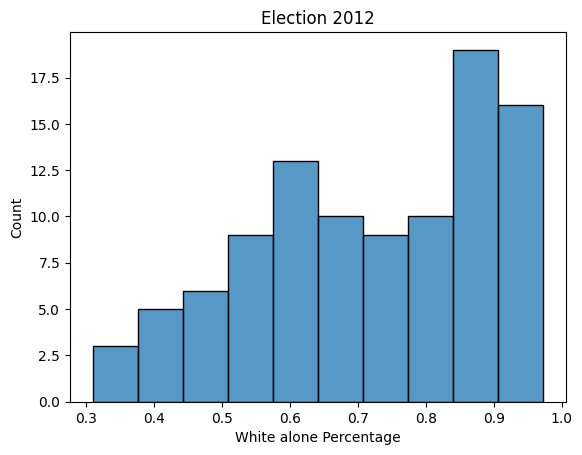

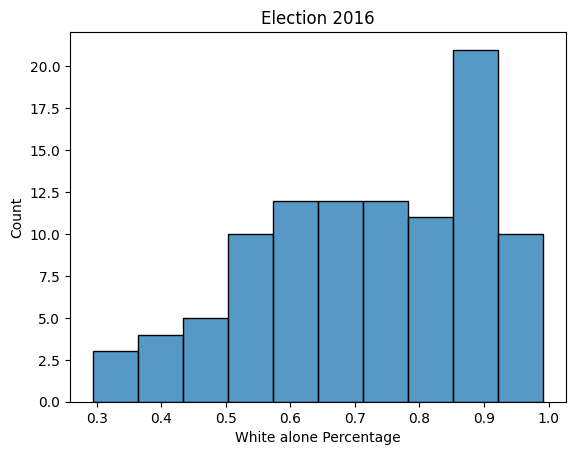

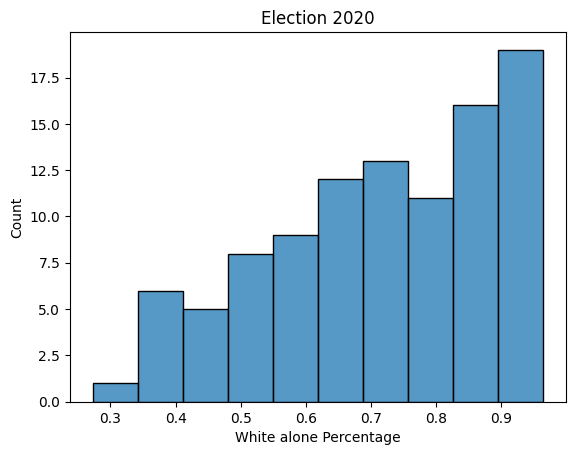

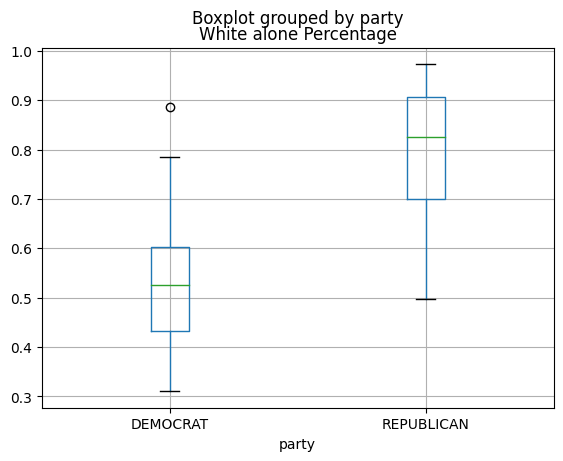

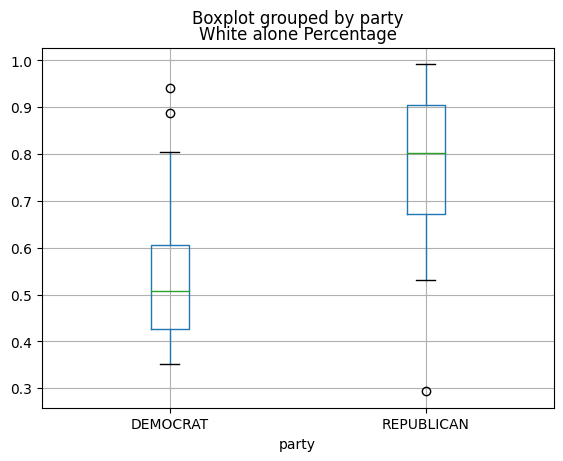

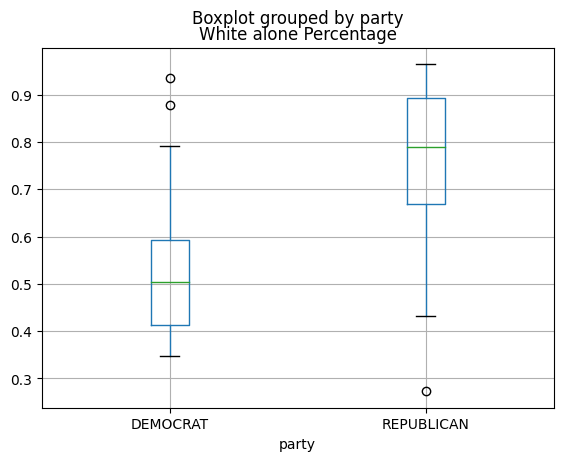

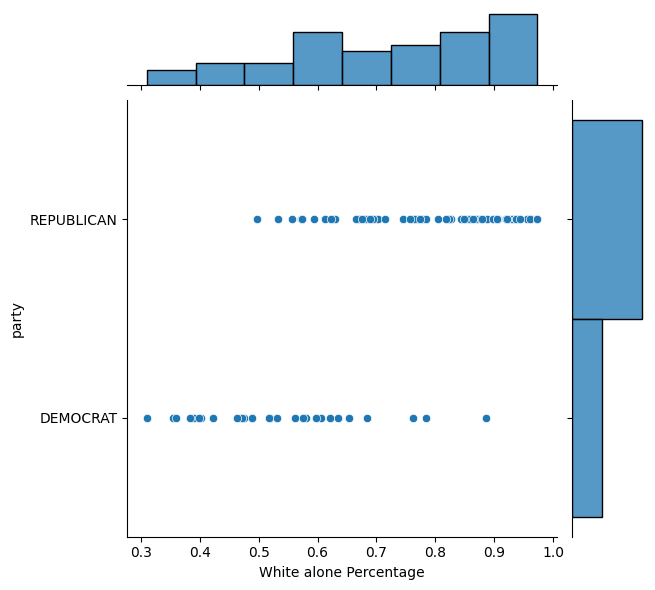

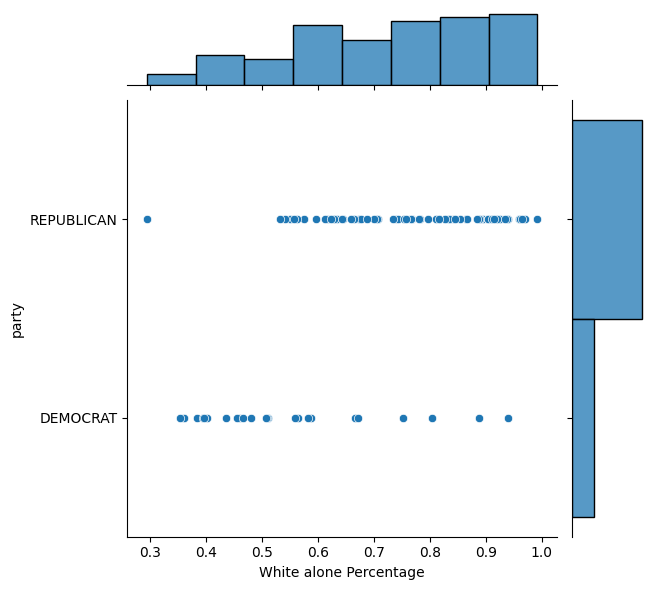

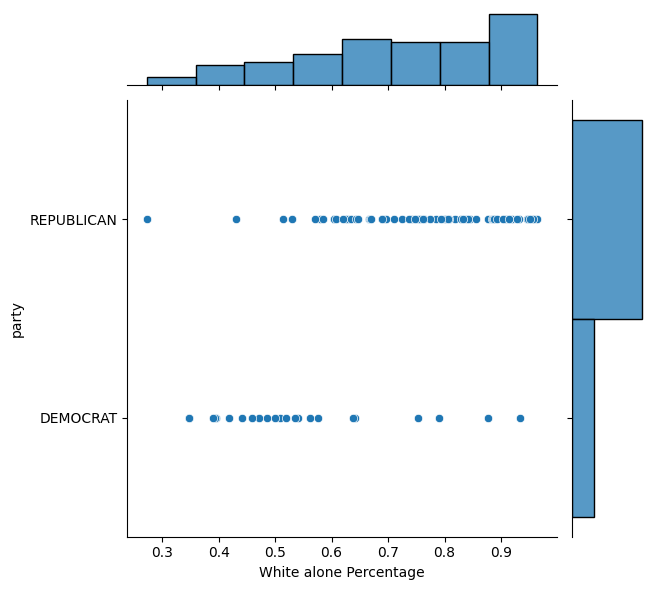

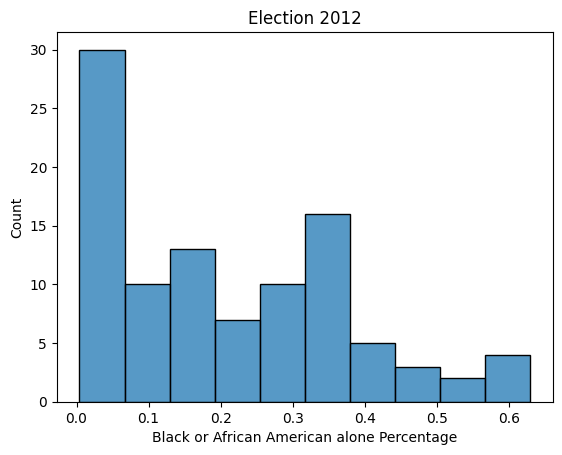

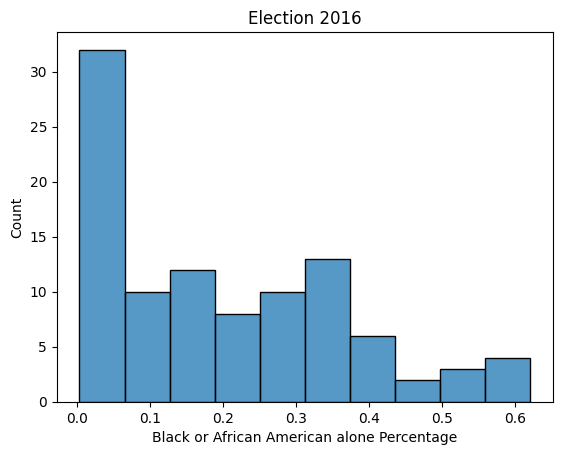

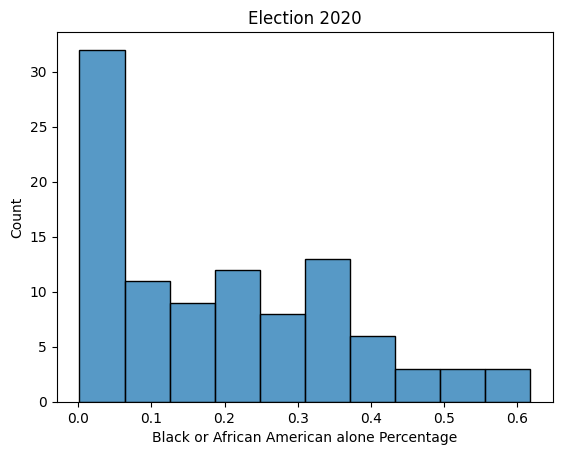

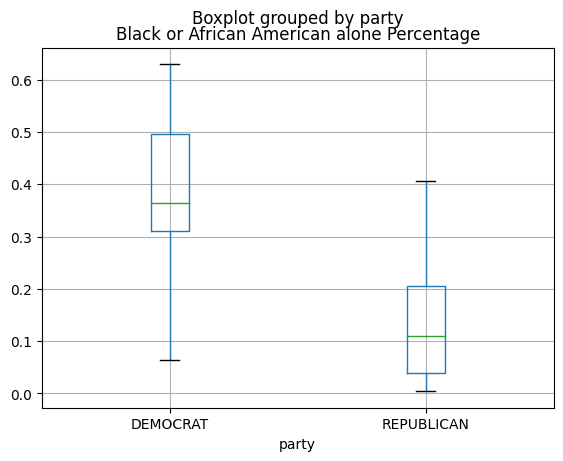

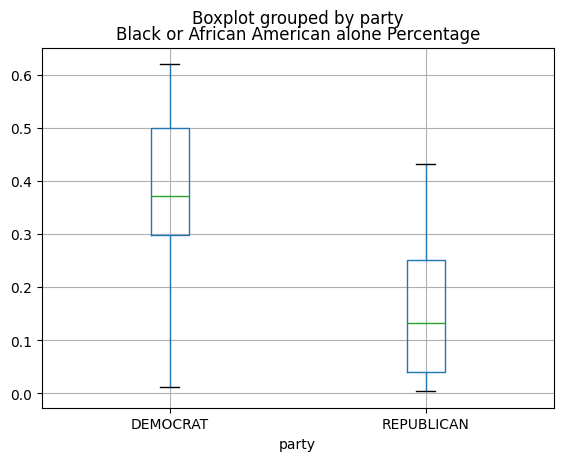

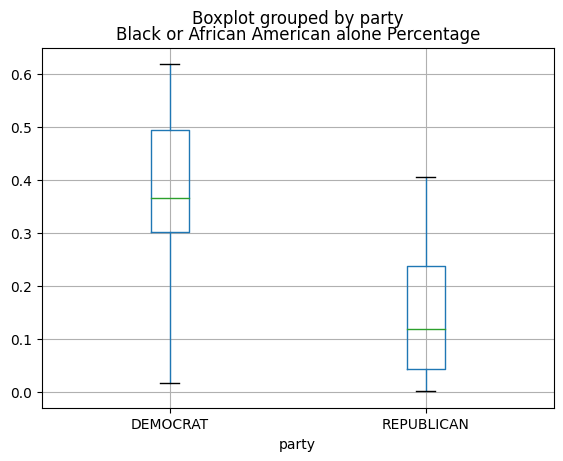

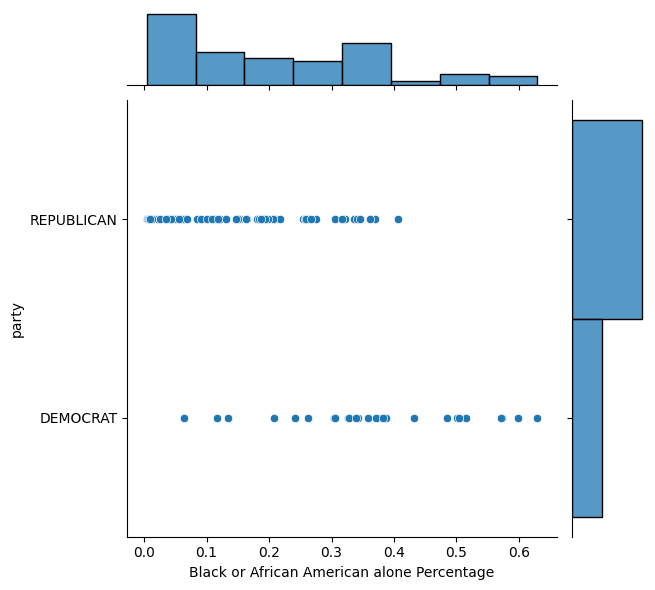

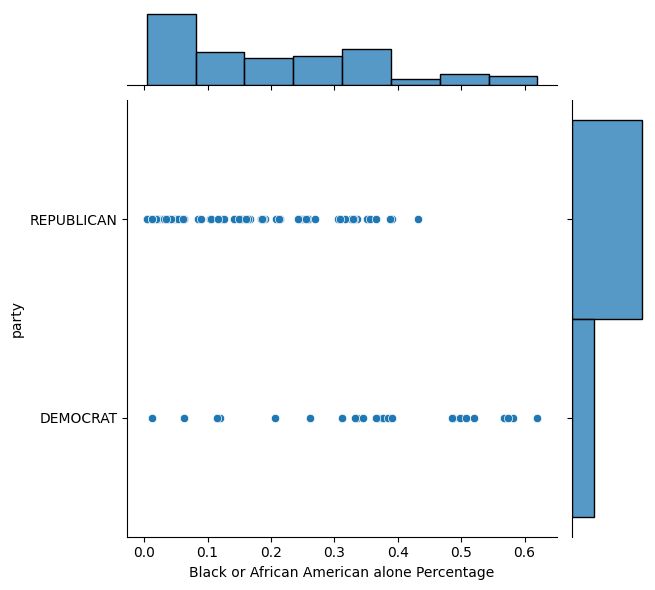

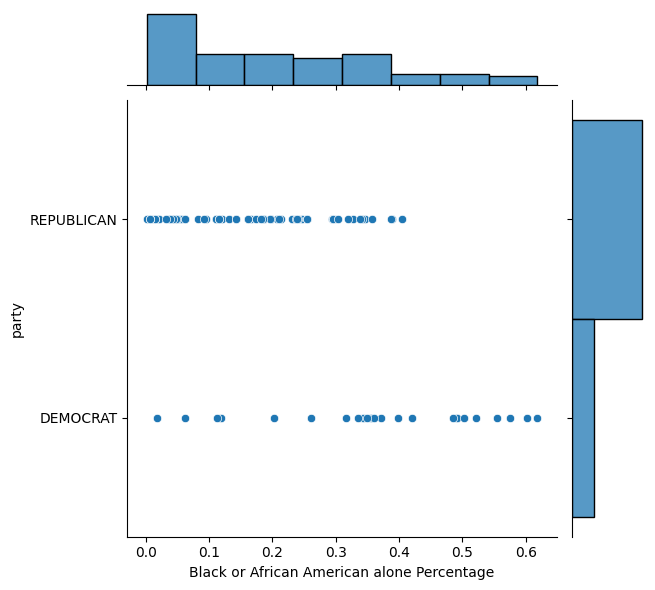

In [16]:
# EDA - Race

sns.histplot(election2012['White alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['White alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['White alone Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of White people
plt.title('Election 2020')

election2012.boxplot(column = 'White alone Percentage',by = 'party')
election2016.boxplot(column = 'White alone Percentage',by = 'party')
election2020.boxplot(column = 'White alone Percentage',by = 'party') # Boxplot of White people by voted party

sns.jointplot(x=election2012['White alone Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['White alone Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['White alone Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


sns.histplot(election2012['Black or African American alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Black or African American alone Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Black or African American alone Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of Black people
plt.title('Election 2020')

election2012.boxplot(column = 'Black or African American alone Percentage',by = 'party')
election2016.boxplot(column = 'Black or African American alone Percentage',by = 'party')
election2020.boxplot(column = 'Black or African American alone Percentage',by = 'party') # Boxplot of Black people by voted party

sns.jointplot(x=election2012['Black or African American alone Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Black or African American alone Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Black or African American alone Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)

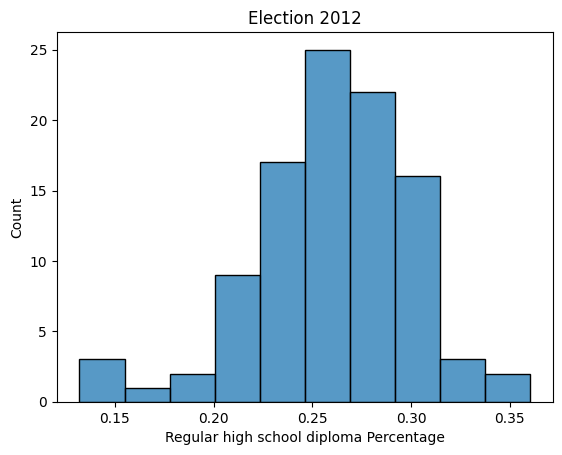

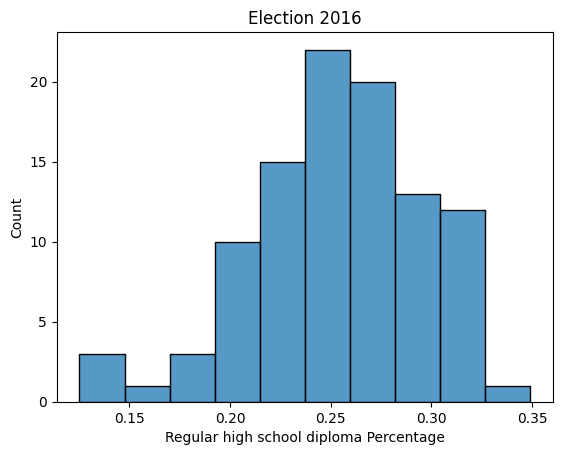

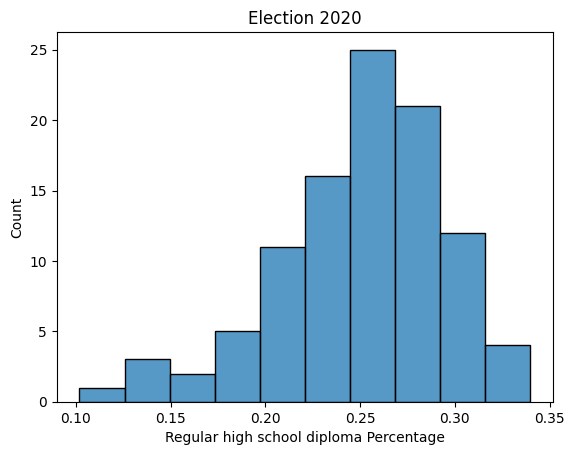

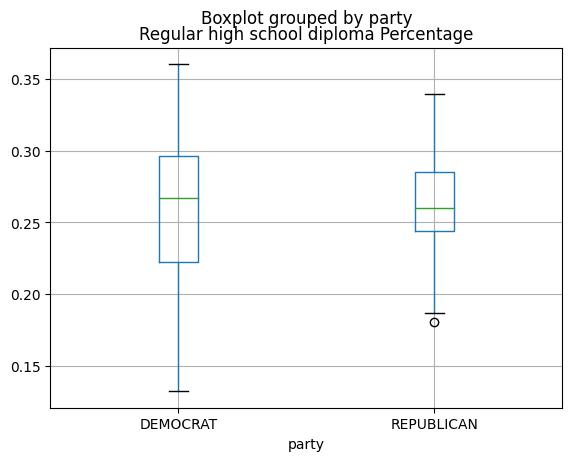

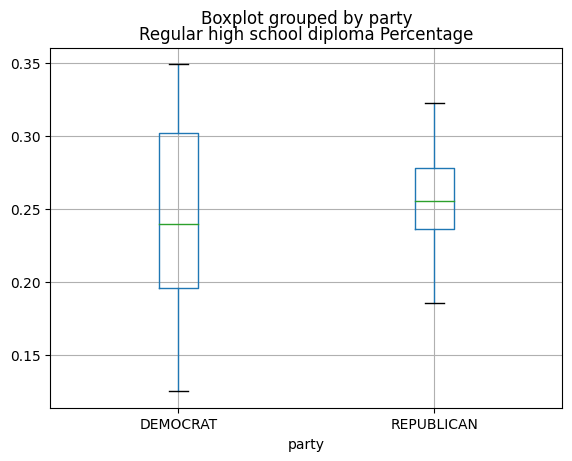

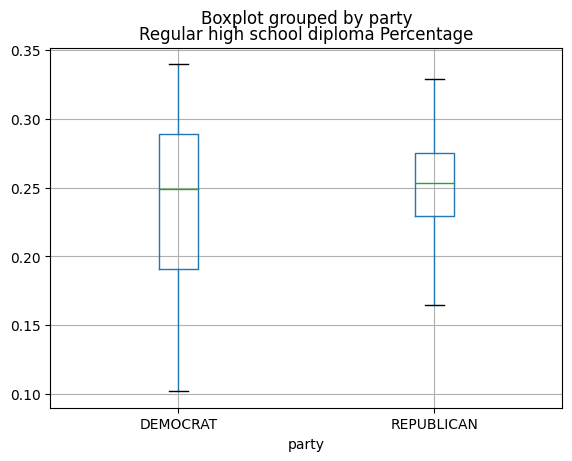

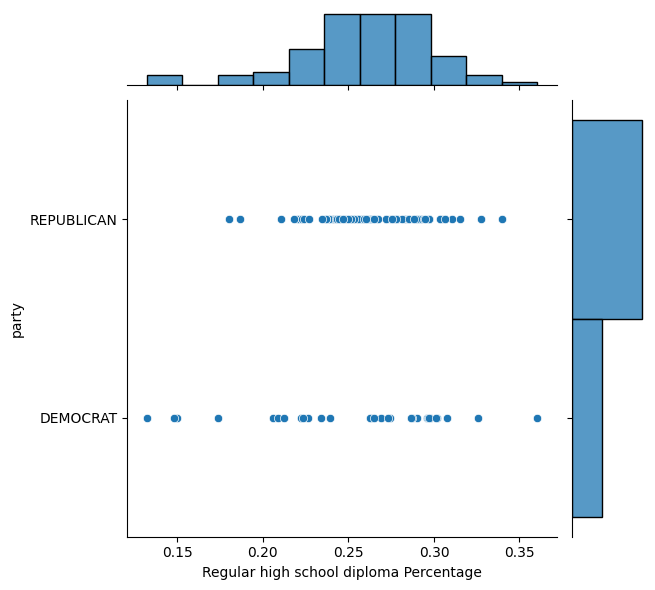

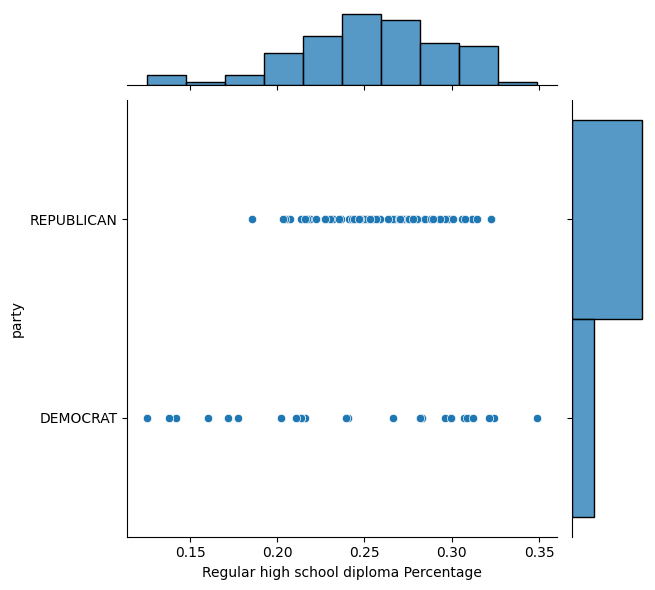

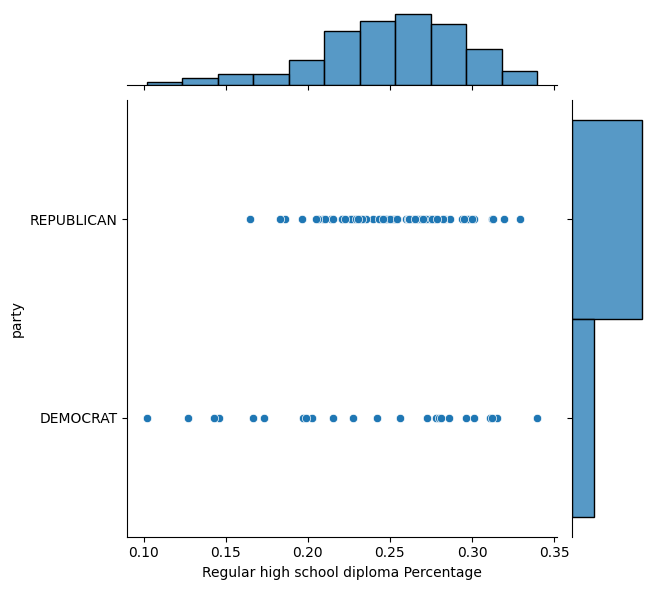

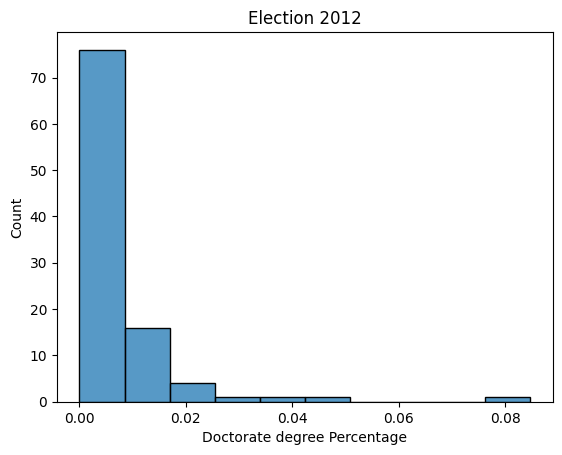

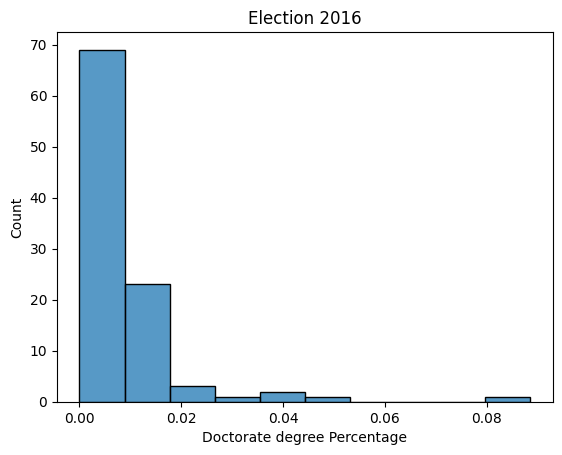

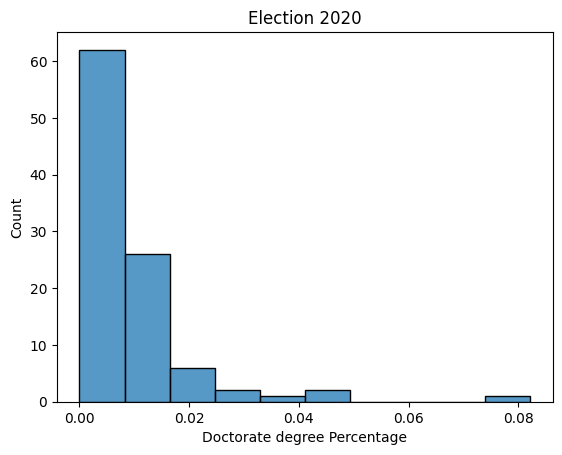

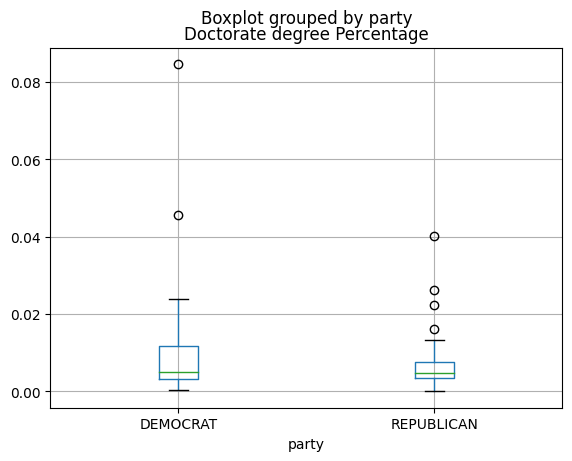

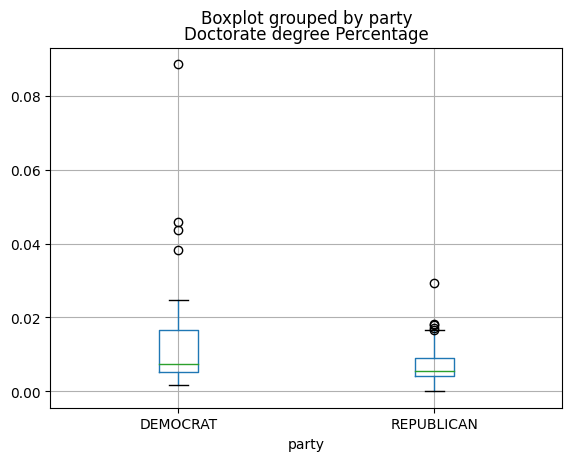

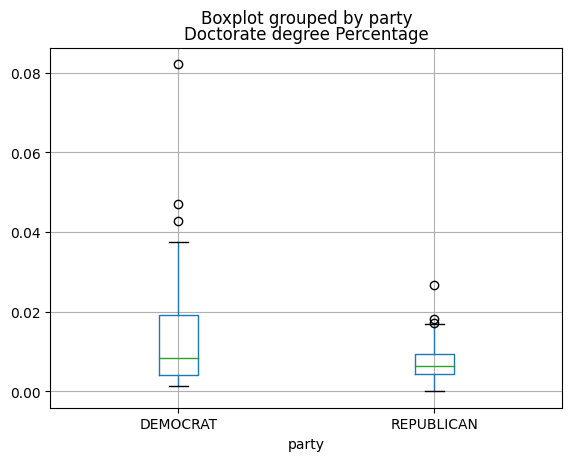

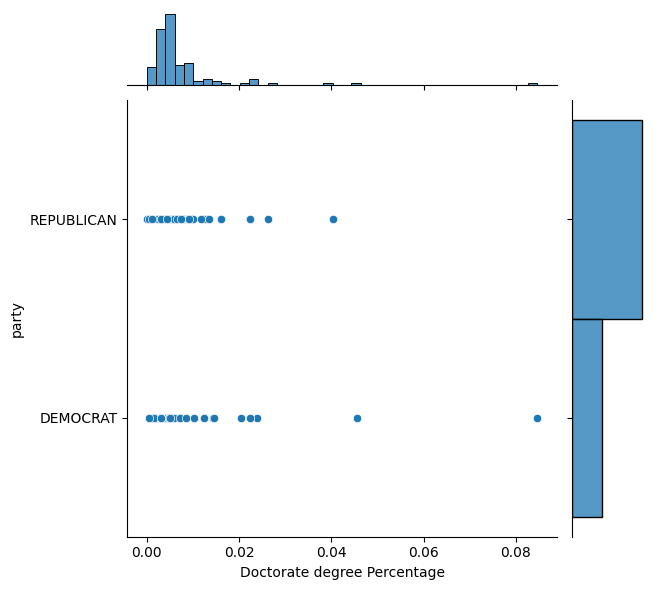

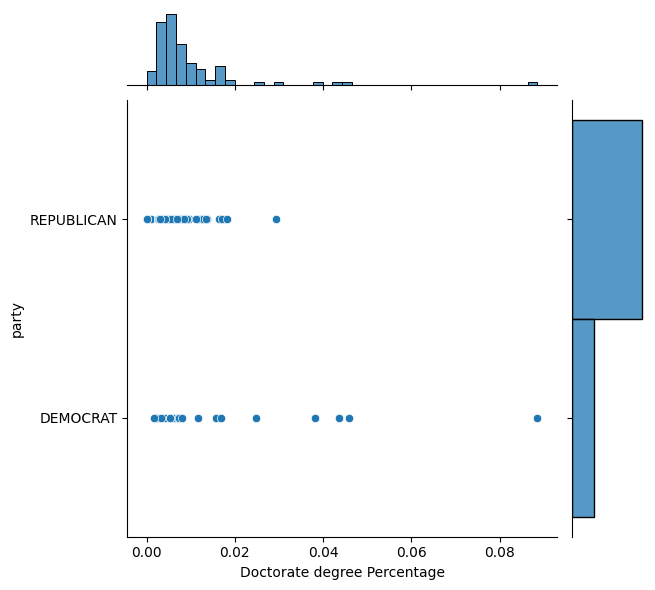

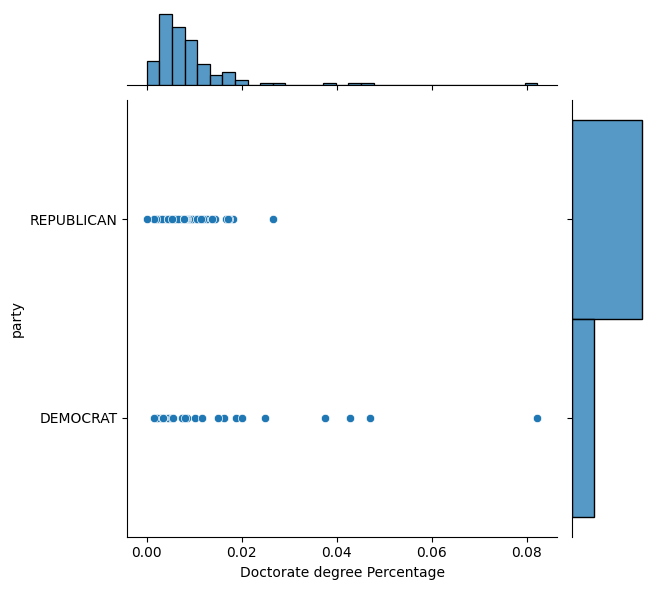

In [17]:
# EDA - Education

sns.histplot(election2012['Regular high school diploma Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Regular high school diploma Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Regular high school diploma Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of those with a high school diploma
plt.title('Election 2020')

election2012.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
election2016.boxplot(column = 'Regular high school diploma Percentage',by = 'party')
election2020.boxplot(column = 'Regular high school diploma Percentage',by = 'party') # Boxplot of high school graduates by voted party

sns.jointplot(x=election2012['Regular high school diploma Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Regular high school diploma Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Regular high school diploma Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


sns.histplot(election2012['Doctorate degree Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Doctorate degree Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Doctorate degree Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of those with a doctorate
plt.title('Election 2020')

election2012.boxplot(column = 'Doctorate degree Percentage',by = 'party')
election2016.boxplot(column = 'Doctorate degree Percentage',by = 'party')
election2020.boxplot(column = 'Doctorate degree Percentage',by = 'party') # Boxplot of proportion of doctors by voted party

sns.jointplot(x=election2012['Doctorate degree Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['Doctorate degree Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['Doctorate degree Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


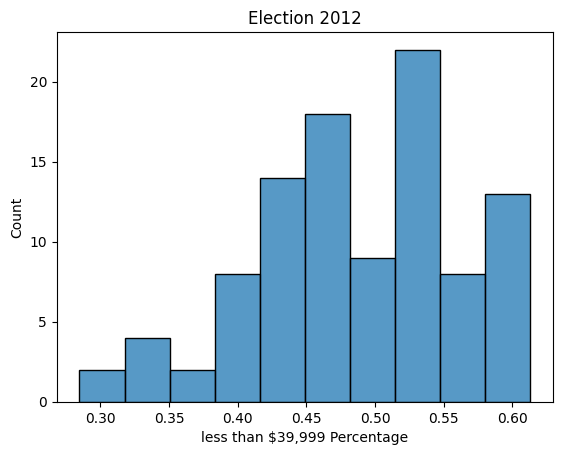

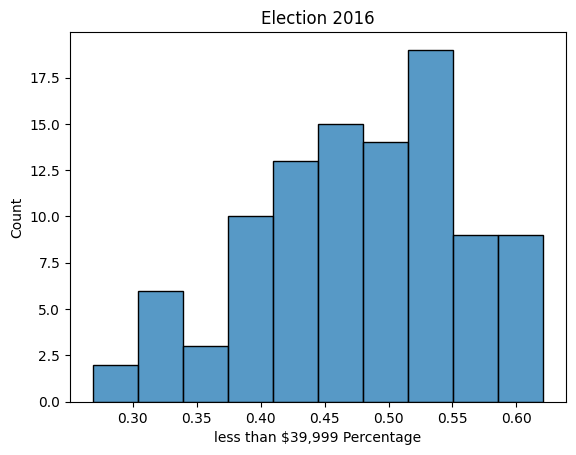

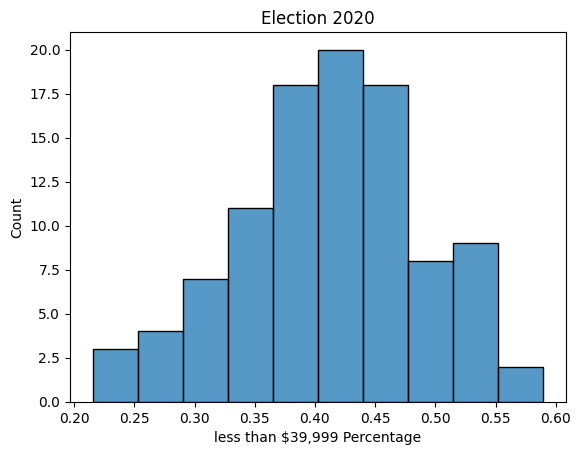

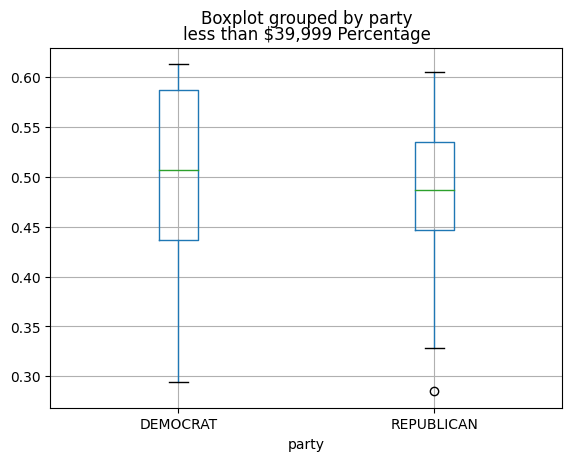

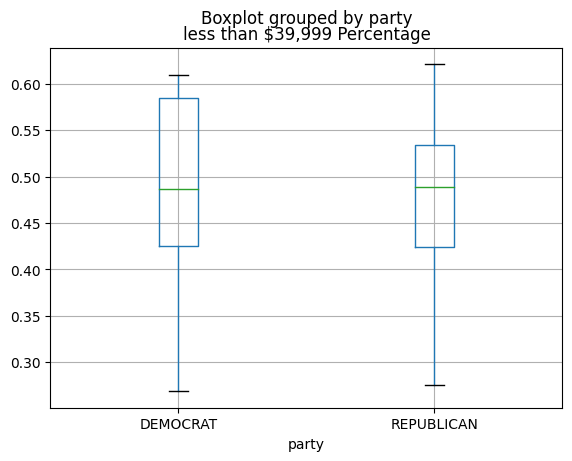

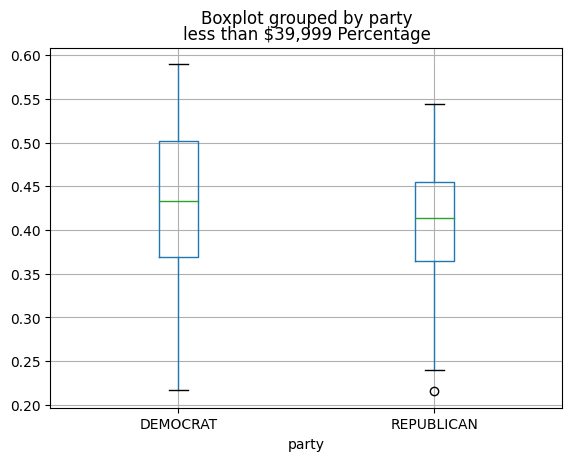

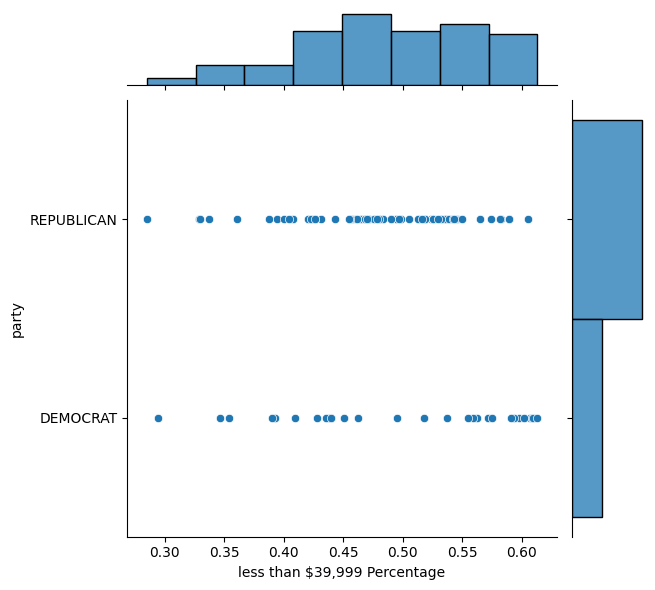

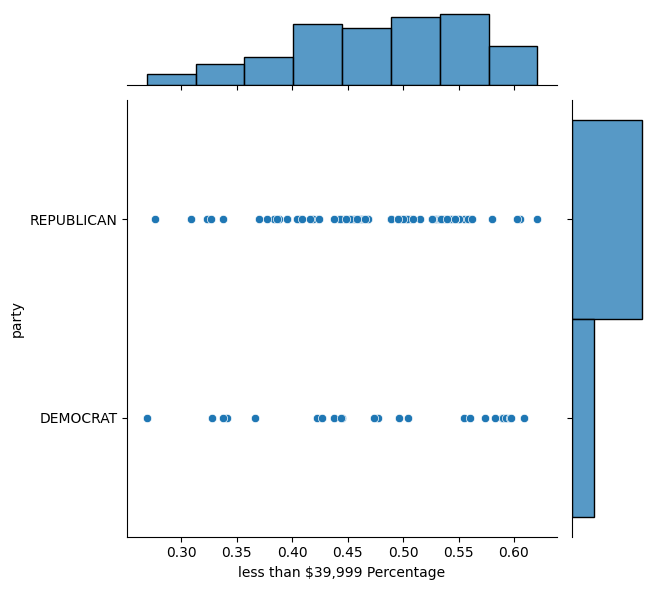

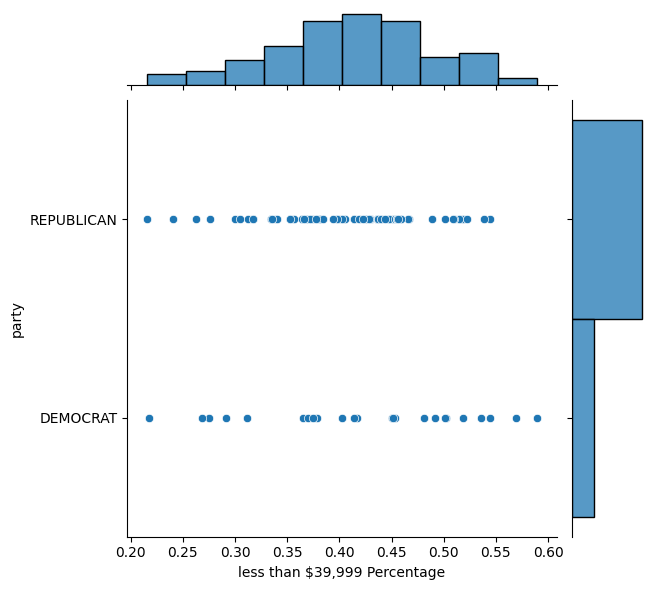

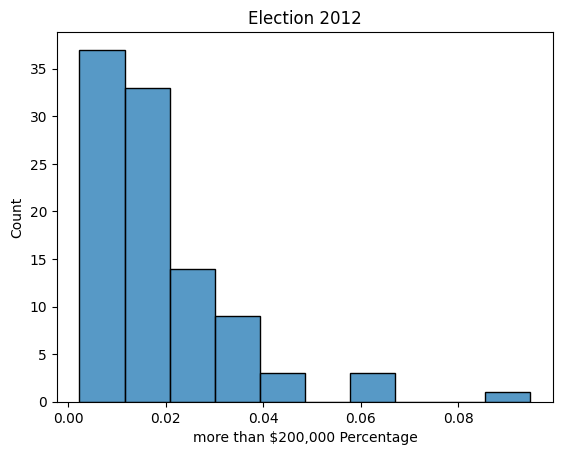

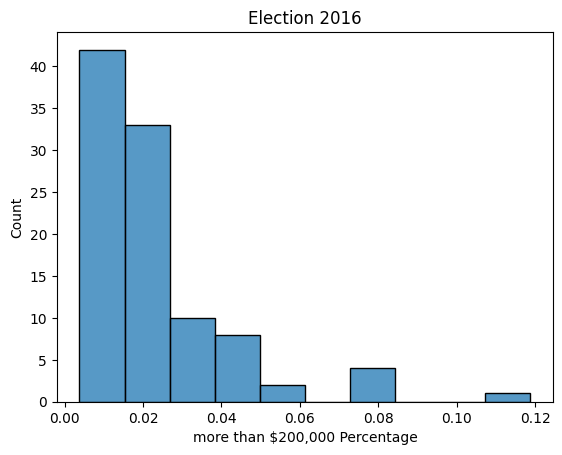

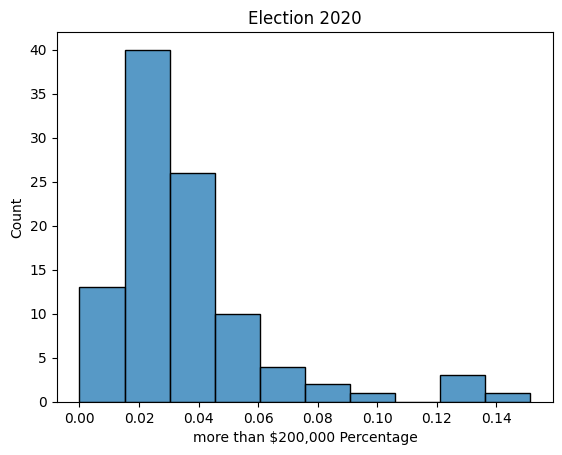

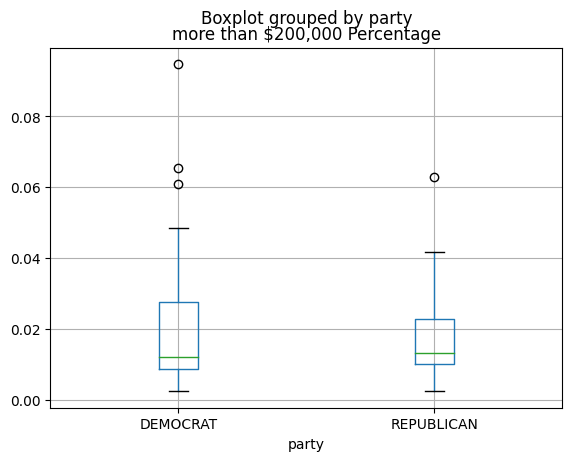

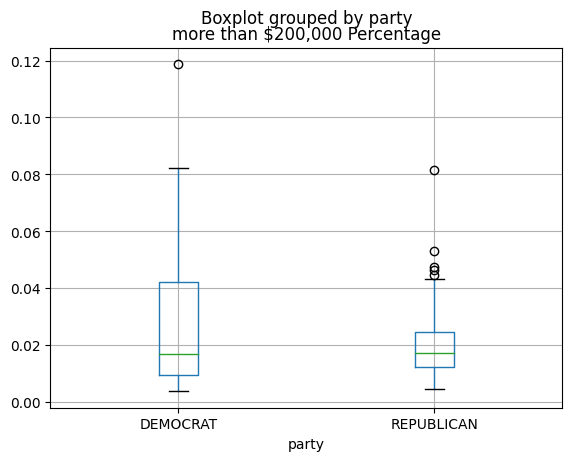

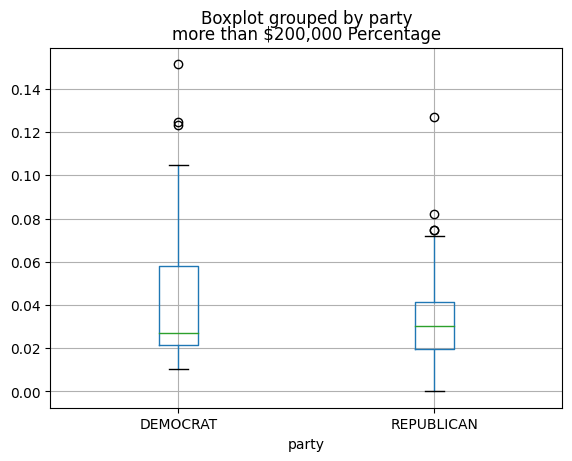

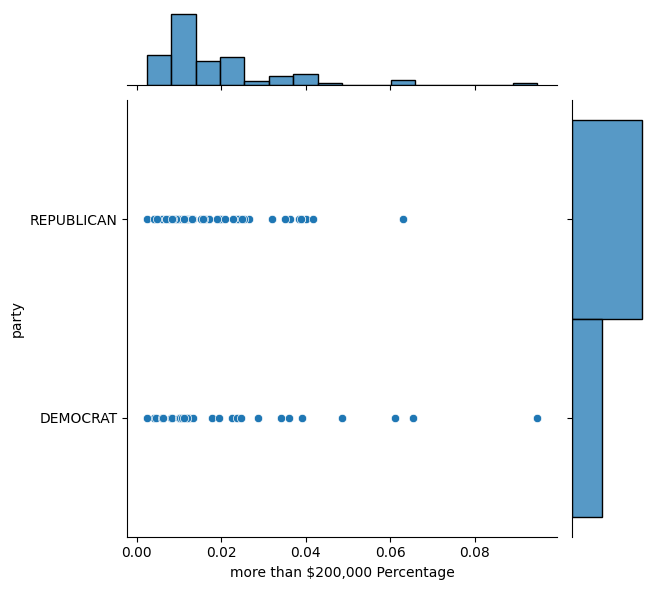

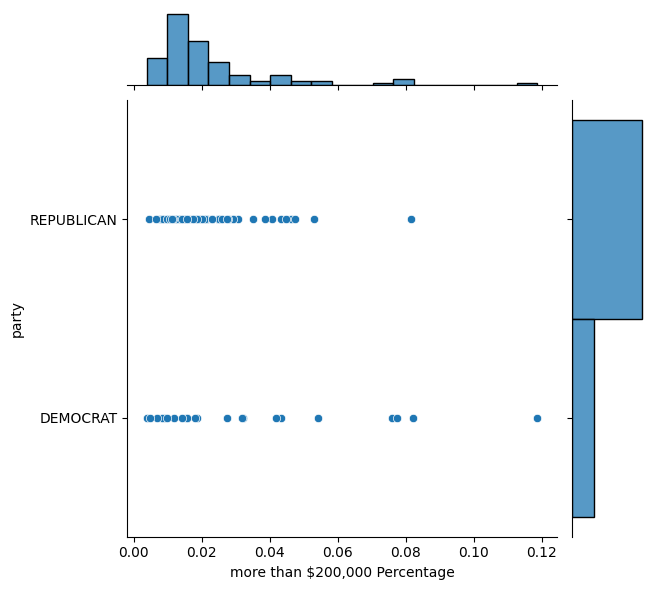

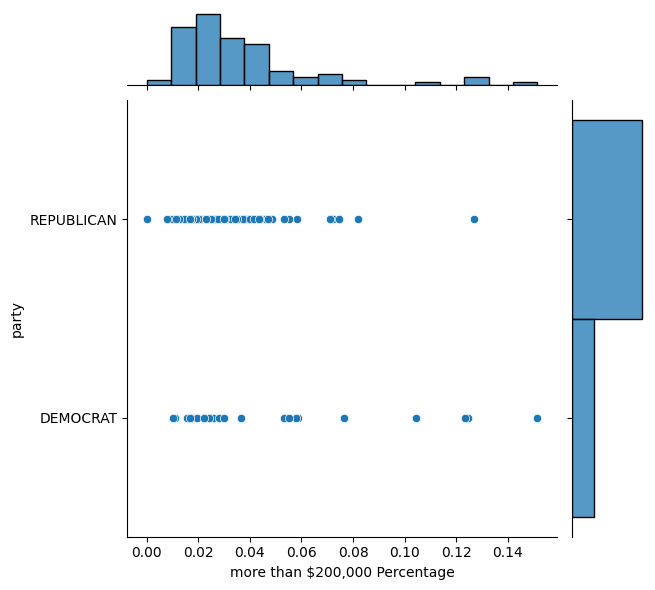

In [18]:
# EDA - Economic status

sns.histplot(election2012['less than $39,999 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['less than $39,999 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['less than $39,999 Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of incomes under $40k
plt.title('Election 2020')

election2012.boxplot(column = 'less than $39,999 Percentage',by = 'party')
election2016.boxplot(column = 'less than $39,999 Percentage',by = 'party')
election2020.boxplot(column = 'less than $39,999 Percentage',by = 'party') # Boxplot of proportion earning under $40k by voted party

sns.jointplot(x=election2012['less than $39,999 Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['less than $39,999 Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['less than $39,999 Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)


sns.histplot(election2012['more than $200,000 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['more than $200,000 Percentage'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['more than $200,000 Percentage'], bins = 10, figure=plt.figure()) # Histogram distribution of incomes over $200k
plt.title('Election 2020')

election2012.boxplot(column = 'more than $200,000 Percentage',by = 'party')
election2016.boxplot(column = 'more than $200,000 Percentage',by = 'party')
election2020.boxplot(column = 'more than $200,000 Percentage',by = 'party') # Boxplot of proportion earning over $200k by voted party

sns.jointplot(x=election2012['more than $200,000 Percentage'],y=election2012['party'])
sns.jointplot(x=election2016['more than $200,000 Percentage'],y=election2016['party'])
sns.jointplot(x=election2020['more than $200,000 Percentage'],y=election2020['party']) # Joint plots (histogram x scatterplot)

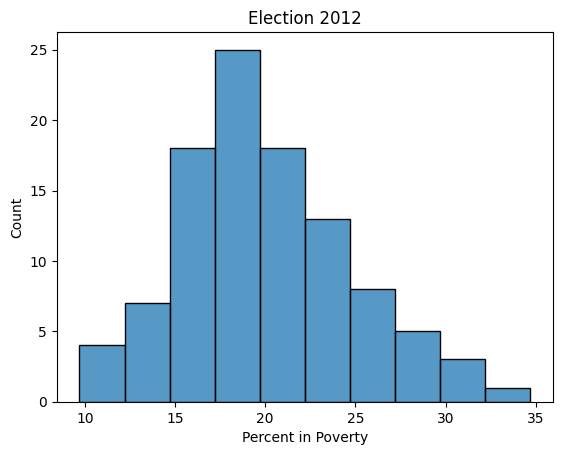

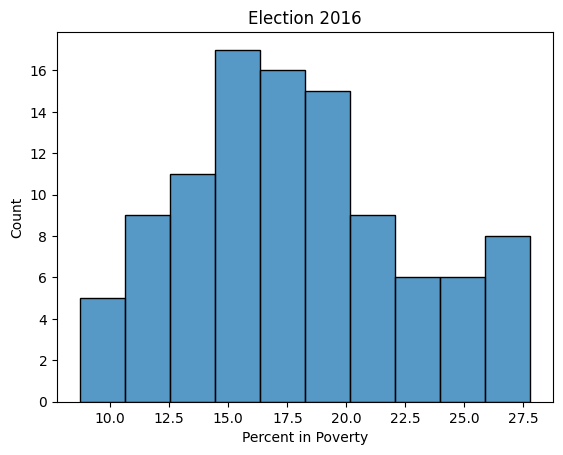

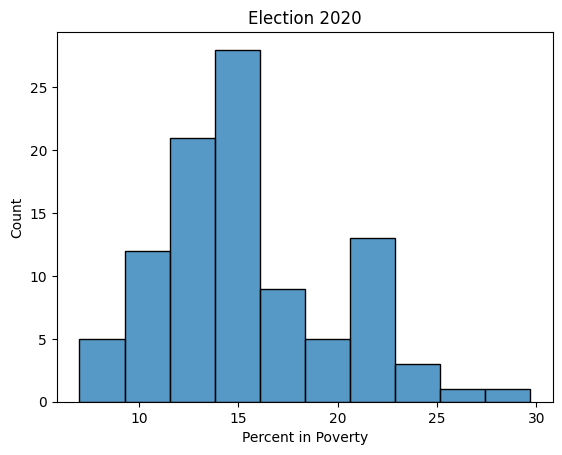

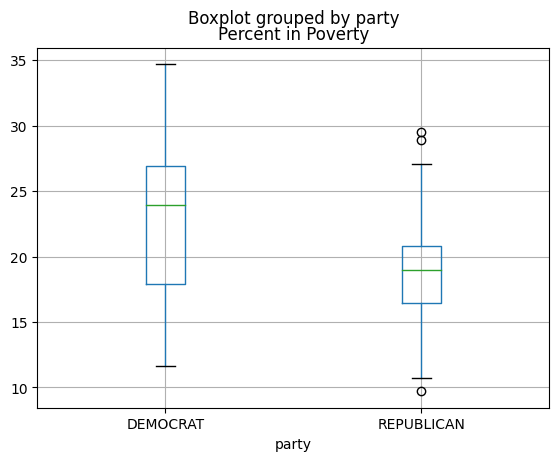

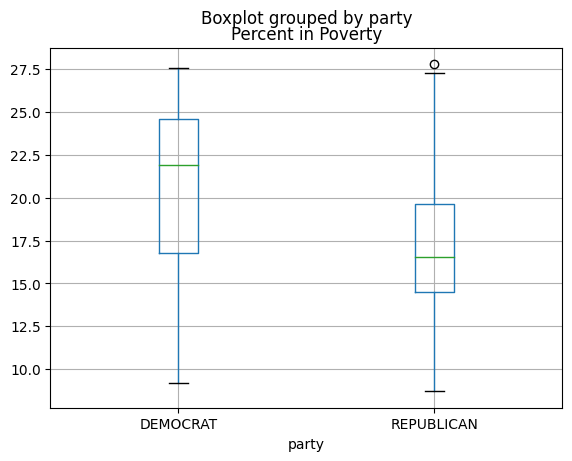

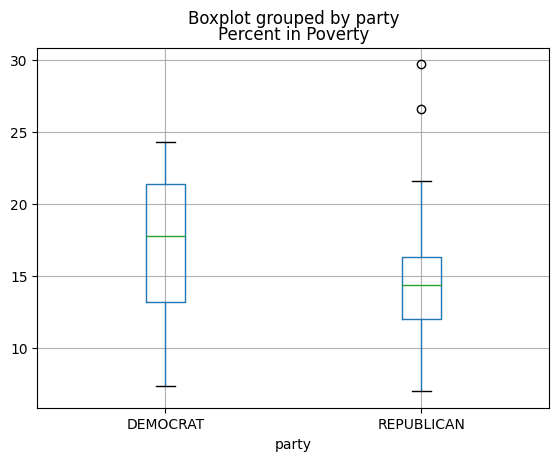

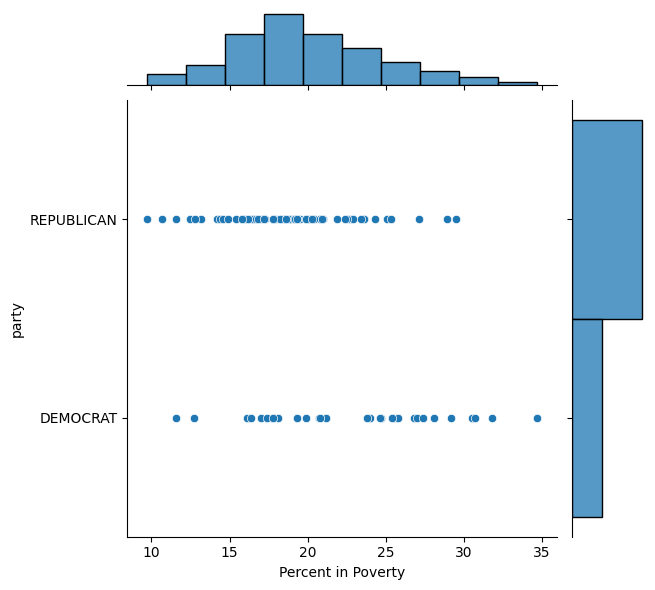

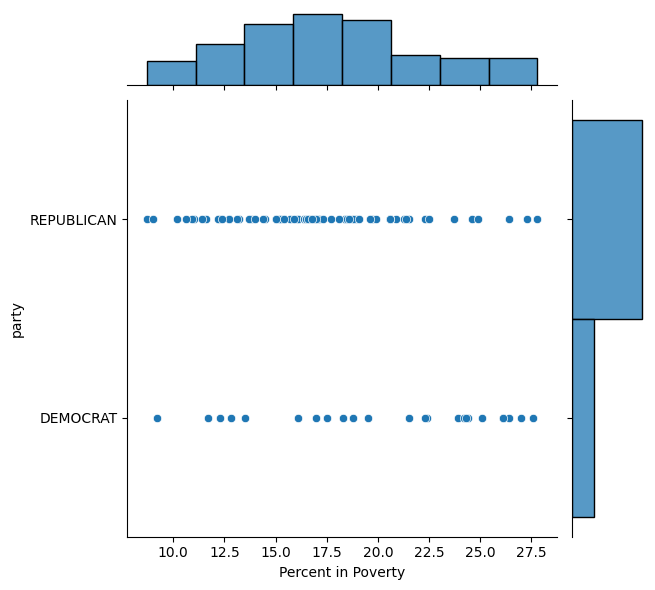

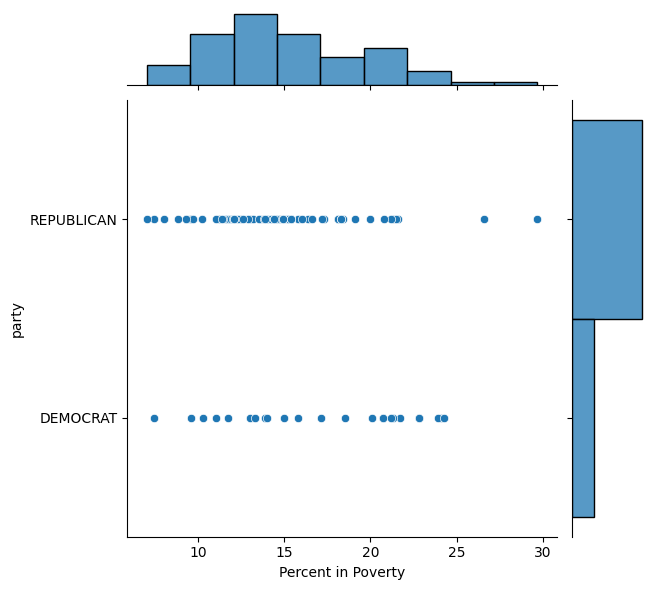

In [19]:
# EDA - Poverty

sns.histplot(election2012['Percent in Poverty'], bins = 10, figure=plt.figure())
plt.title('Election 2012')
sns.histplot(election2016['Percent in Poverty'], bins = 10, figure=plt.figure())
plt.title('Election 2016')
sns.histplot(election2020['Percent in Poverty'], bins = 10, figure=plt.figure()) # Histogram distribution of % in poverty
plt.title('Election 2020')

election2012.boxplot(column = 'Percent in Poverty',by = 'party')
election2016.boxplot(column = 'Percent in Poverty',by = 'party')
election2020.boxplot(column = 'Percent in Poverty',by = 'party') # Boxplot of county poverty rates by voted party

sns.jointplot(x=election2012['Percent in Poverty'],y=election2012['party'])
sns.jointplot(x=election2016['Percent in Poverty'],y=election2016['party'])
sns.jointplot(x=election2020['Percent in Poverty'],y=election2020['party']) # Joint plots (histogram x scatterplot)